In [1]:
#iris 분류하기 

import numpy as np 
import pandas as pd 
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from sklearn.datasets import load_iris
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [33]:
iris=load_iris()
iris_data=pd.DataFrame(iris['data'],dtype=np.float32)
iris_target=pd.DataFrame(iris['target'],dtype=np.float32)
iris_name=pd.DataFrame(iris['target_names'])
print(iris_data.info())
print(iris_target.info())
print(iris_name.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float32
 1   1       150 non-null    float32
 2   2       150 non-null    float32
 3   3       150 non-null    float32
dtypes: float32(4)
memory usage: 2.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float32
dtypes: float32(1)
memory usage: 728.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes
None


In [35]:
X=torch.from_numpy(iris_data[:100].values)
y=torch.from_numpy(iris_target[:100].values)

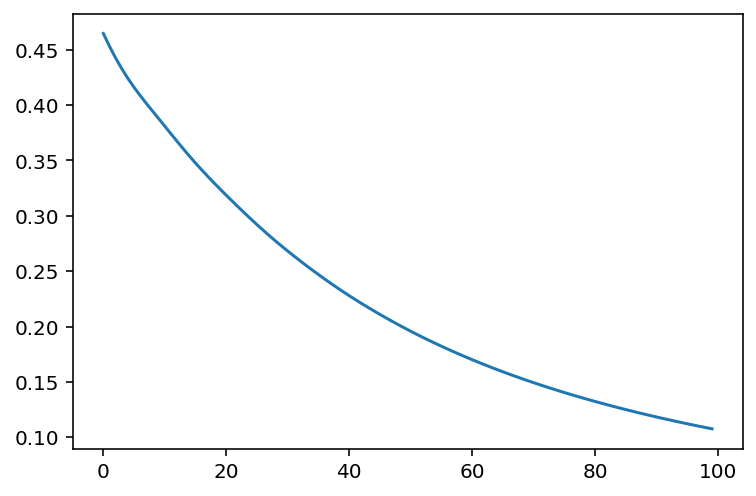

In [43]:
net=nn.Linear(4,1)
loss_fn=nn.BCEWithLogitsLoss()
optimzier=optim.Adam(net.parameters(),lr=1e-2)
losses=[]

for epoch in range(100):
    batch_loss=0.0
    optimzier.zero_grad()
    y_pred=net(X)
    loss=loss_fn(y_pred,y)
    loss.backward()
    optimzier.step()
    batch_loss+=loss.item()

    losses.append(batch_loss)

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt 

plt.plot(losses)
plt.show()